<a href="https://colab.research.google.com/github/neelchoudhury/100-nlp-papers/blob/master/lotr_embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LOTR Embeddings

Ideally, I guess this should be called Middle-Earth Embeddings.
I am going to use the following books to create embeddings - 

1. The LOTR Trilogy
2. The Hobbit
3. The Silmarillion

I will add other books later, to get a better view. Maybe a good idea is also to Scrape LOTR Wiki websites to get more textual information about the Middle-Earth World.

In [1]:
from google.colab import files
files = files.upload()

Saving HobbitBook.json to HobbitBook.json
Saving LordOfTheRingsBook.json to LordOfTheRingsBook.json
Saving TheSilmarillion.txt to TheSilmarillion.txt


In [3]:
type(files)

dict

In [4]:
for k,_ in files.items():
  print(k)

HobbitBook.json
LordOfTheRingsBook.json
TheSilmarillion.txt


In [5]:
hobbit = files['HobbitBook.json']
lotr = files['LordOfTheRingsBook.json']
silmarillion = files['TheSilmarillion.txt']

In [6]:
type(hobbit)

bytes

In [8]:
type(silmarillion)

bytes

In [12]:
import json

hobbit_json = json.loads(hobbit)

In [13]:
type(hobbit_json)

list

In [15]:
lotr_json = json.loads(lotr)

In [56]:
silmarillion_text = silmarillion.decode("latin1", errors="ignore")

In [30]:
silmarillion_text[0:40]

'FOREWORD\r\nThe Silmarillion, now publishe'

In [27]:
silmarillion[2740:2747]

b' of T\xfar'

In [34]:
silmarillion_text[2740:2750]

' of Túrin '

In [57]:
import re

silmarillion_text_clean = re.sub(r'\r|\n', r' ', silmarillion_text.strip().lower())
silmarillion_text_clean = re.sub(r'chapter\s+\d+', r'', silmarillion_text_clean)
# silmarillion_text_clean = re.sub(r'[,:;\.!]', r'', silmarillion_text_clean)
# silmarillion_text_clean = re.sub(r'["\']', r' ', silmarillion_text_clean)

In [58]:
silmarillion_text_clean[0:200]

'foreword  the silmarillion, now published four years after the death of its author, is an account of the elder days, or the first age of the world. in the lord of the rings were narrated the great eve'

In [51]:
import nltk

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [64]:

from nltk.tokenize import sent_tokenize, word_tokenize

In [60]:
silmarillion_sent = sent_tokenize(silmarillion_text_clean)

In [61]:
len(silmarillion_sent)

5498

In [62]:
silmarillion_sent[0]

'foreword  the silmarillion, now published four years after the death of its author, is an account of the elder days, or the first age of the world.'

In [65]:
silmarillion_tokens = []

for sent in silmarillion_sent:
  silmarillion_tokens.append(word_tokenize(sent))

In [66]:
silmarillion_tokens[0]

['foreword',
 'the',
 'silmarillion',
 ',',
 'now',
 'published',
 'four',
 'years',
 'after',
 'the',
 'death',
 'of',
 'its',
 'author',
 ',',
 'is',
 'an',
 'account',
 'of',
 'the',
 'elder',
 'days',
 ',',
 'or',
 'the',
 'first',
 'age',
 'of',
 'the',
 'world',
 '.']

In [67]:
import gensim
from gensim.models.phrases import Phrases, Phraser

bigrams = Phrases(silmarillion_tokens)

In [71]:
silmarillion_final_tokens = []

for sent in silmarillion_tokens:
  phrases = bigrams[sent]
  silmarillion_final_tokens.append(phrases)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [72]:
silmarillion_final_tokens[0]

['foreword',
 'the',
 'silmarillion',
 ',',
 'now',
 'published',
 'four',
 'years',
 'after',
 'the',
 'death',
 'of',
 'its',
 'author',
 ',',
 'is',
 'an',
 'account',
 'of',
 'the',
 'elder_days',
 ',',
 'or',
 'the',
 'first_age',
 'of',
 'the',
 'world',
 '.']

In [73]:
import gensim.models

model = gensim.models.Word2Vec(sentences=silmarillion_final_tokens)

In [84]:
model.wv.most_similar('fingolfin')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('fingon', 0.9995997548103333),
 ('most', 0.9995915293693542),
 ('because', 0.9995751976966858),
 ('doriath', 0.9995064735412598),
 ('hithlum', 0.9994909763336182),
 ('finarfin', 0.9994851350784302),
 ('rose', 0.9994783401489258),
 ('orcs', 0.9994781613349915),
 ('deeds', 0.9994683265686035),
 ('valinor', 0.999459981918335)]

In [87]:
hobbit_text = ""

for block in hobbit_json:
  hobbit_text += block['ChapterData'] + '\r\n'

In [88]:
lotr_text = ""

for block in lotr_json:
  lotr_text += block['ChapterData'] + '\r\n'

In [119]:
len(silmarillion_text)

839630

In [117]:
len(lotr_text)

2479084

In [118]:
len(hobbit_text)

522163

In [89]:
all_text = silmarillion_text + hobbit_text + lotr_text

In [90]:
len(all_text)

3840877

In [126]:
all_text_clean = re.sub(r'\r|\n', r' ', all_text.strip().lower())
all_text_clean = re.sub(r'chapter\s+\d+', r'', all_text_clean)

In [127]:
all_sent = sent_tokenize(all_text_clean)

In [128]:
all_sent[-3252:-3245]

['they were out on the plain now and drawing near the entrance to udun.',
 'some way in front of it, before the gate at the bridge-end, the road from the west converged with others coming from the south, and from barad-dur.',
 'along all the roads troops were moving; for the captains of the west were advancing and the dark lord was speeding his forces north.',
 'so it chanced that several companies came together at the road-meeting, in the dark beyond the light of the watch-fires on the wall.',
 'at once there was great jostling and cursing as each troop tried to get first to the gate and the ending of their march.',
 'though the drivers yelled and plied their whips, scuffles broke out and some blades were drawn.',
 'a troop of heavy-armed uruks from barad-dur charged into the durthang line and threw them into confusion.']

In [129]:
len(all_sent)

44991

In [130]:
all_tokens = []
cnt_all_tokens = 0

for sent in all_sent:
  tokens = word_tokenize(sent)
  all_tokens.append(tokens)
  cnt_all_tokens += len(tokens)

In [131]:
cnt_all_tokens

841313

In [132]:
all_bigrams = Phrases(all_sent)

In [133]:
all_bigram_tokens = []
cnt_bigram_tokens = 0

for sent in all_tokens:
  bigram_tokens = bigrams[sent]
  all_bigram_tokens.append(bigram_tokens)
  cnt_bigram_tokens += len(bigram_tokens)

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [134]:
cnt_bigram_tokens

817949

In [135]:
all_bigram_tokens[-3252:-3245]

[['they',
  'were',
  'out',
  'on',
  'the',
  'plain',
  'now',
  'and',
  'drawing',
  'near',
  'the',
  'entrance',
  'to',
  'udun',
  '.'],
 ['some',
  'way',
  'in',
  'front',
  'of',
  'it',
  ',',
  'before',
  'the',
  'gate',
  'at',
  'the',
  'bridge-end',
  ',',
  'the',
  'road',
  'from',
  'the',
  'west',
  'converged',
  'with',
  'others',
  'coming',
  'from',
  'the',
  'south',
  ',',
  'and',
  'from',
  'barad-dur',
  '.'],
 ['along',
  'all',
  'the',
  'roads',
  'troops',
  'were',
  'moving',
  ';',
  'for',
  'the',
  'captains',
  'of',
  'the',
  'west',
  'were',
  'advancing',
  'and',
  'the',
  'dark_lord',
  'was',
  'speeding',
  'his',
  'forces',
  'north',
  '.'],
 ['so',
  'it_chanced',
  'that',
  'several',
  'companies',
  'came',
  'together',
  'at',
  'the',
  'road-meeting',
  ',',
  'in',
  'the',
  'dark',
  'beyond',
  'the',
  'light',
  'of',
  'the',
  'watch-fires',
  'on',
  'the',
  'wall',
  '.'],
 ['at',
  'once',
  'there',

In [136]:
model_three_books = gensim.models.Word2Vec(sentences=all_bigram_tokens)

In [138]:
model_three_books.wv.most_similar('frodo')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('sam', 0.9811313152313232),
 ('pippin', 0.9463716149330139),
 ('bilbo', 0.9423794746398926),
 ('gollum', 0.9355931282043457),
 ('gandalf', 0.9116418361663818),
 ('merry', 0.8822979927062988),
 ('boromir', 0.8775188326835632),
 ('aragorn', 0.8722878694534302),
 ('faramir', 0.8624827861785889),
 ('strider', 0.8527661561965942)]

In [139]:
model_three_books.wv.most_similar('gandalf')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('strider', 0.9559337496757507),
 ('boromir', 0.9453694224357605),
 ('aragorn', 0.9385251998901367),
 ('faramir', 0.937170684337616),
 ('merry', 0.9339939951896667),
 ('bilbo', 0.9133778214454651),
 ('frodo', 0.9116418361663818),
 ('pippin', 0.9091291427612305),
 ('sam', 0.9045179486274719),
 ('gimli', 0.8939559459686279)]

In [141]:
model_three_books.wv.most_similar('sauron')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('morgoth', 0.9273006319999695),
 ('saruman', 0.8866622447967529),
 ('ilúvatar', 0.8389760255813599),
 ('melkor', 0.8328588008880615),
 ('that_time', 0.822688102722168),
 ('enemy', 0.8195509314537048),
 ('ulmo', 0.8155595660209656),
 ('fëanor', 0.8135055899620056),
 ('beginning', 0.8030401468276978),
 ('substance', 0.7994720935821533)]

In [143]:
model_three_books.wv.most_similar('glaurung')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('maedhros', 0.9555717706680298),
 ('fingon', 0.9531328678131104),
 ('weeping', 0.9515796303749084),
 ('celegorm', 0.9502866268157959),
 ('tuor', 0.9493952393531799),
 ('mîm', 0.9433969259262085),
 ('despair', 0.9427868723869324),
 ('finishing', 0.9427171945571899),
 ('melian', 0.9419878125190735),
 ('gasp', 0.941307544708252)]

In [144]:
model_three_books.wv.most_similar('ancalagon')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('fortress', 0.9654216766357422),
 ('text_as', 0.9558560848236084),
 ('green_mound', 0.9533474445343018),
 ('torrent', 0.9515771865844727),
 ('quenya_name', 0.9505199790000916),
 ('tombs', 0.9495702981948853),
 ('founded', 0.9477051496505737),
 ('girdle', 0.9438568353652954),
 ('fastness', 0.943145215511322),
 ('d_)', 0.9412729740142822)]

In [145]:
model_three_books.wv.most_similar('smaug')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('difference', 0.958035945892334),
 ('laws', 0.9550260305404663),
 ('unlikely', 0.9517083168029785),
 ("'nothing", 0.9511921405792236),
 ('shelob', 0.9493365287780762),
 ('pinch', 0.9490600824356079),
 ('riddles', 0.9458019733428955),
 ('troll', 0.9456537961959839),
 ('fatty', 0.9434322118759155),
 ('thief', 0.9426092505455017)]

In [146]:
model_three_books.wv.most_similar('elrond')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('denethor', 0.9357262253761292),
 ('theoden', 0.9018715023994446),
 ('glóin', 0.8980854749679565),
 ('galadriel', 0.8768000602722168),
 ('eomer', 0.8759504556655884),
 ('thorin', 0.8740214109420776),
 ('balin', 0.8638989925384521),
 ('eomund', 0.8636239767074585),
 ('butterbur', 0.8514596223831177),
 ('éomer', 0.8510818481445312)]

In [147]:
model_three_books.wv.most_similar('gollum')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('frodo', 0.9355930685997009),
 ('bilbo', 0.9346021413803101),
 ('sam', 0.9125850200653076),
 ('boromir', 0.8865759968757629),
 ('gandalf', 0.8857231736183167),
 ('pippin', 0.8610973358154297),
 ('strider', 0.8465977907180786),
 ('faramir', 0.8461841344833374),
 ('he', 0.8436329364776611),
 ('treebeard', 0.83555006980896)]

In [148]:
model_three_books.wv.most_similar('shire')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('rivendell', 0.8692772388458252),
 ('eldar', 0.857909083366394),
 ('peace', 0.8325352668762207),
 ('war', 0.83222895860672),
 ('enemy', 0.8309415578842163),
 ('ways', 0.8300570249557495),
 ('fight', 0.821245551109314),
 ('friendship', 0.8193013668060303),
 ('southfarthing', 0.8191047310829163),
 ('youth', 0.8149329423904419)]

In [149]:
model_three_books.wv.most_similar('gondor')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('rohan', 0.889488697052002),
 ('kings', 0.8645479083061218),
 ('beleriand', 0.8291288614273071),
 ('moria', 0.8205814957618713),
 ('lords', 0.8183269500732422),
 ('languages', 0.8126538991928101),
 ('children', 0.8110241293907166),
 ('lórien', 0.8083497285842896),
 ('descendants', 0.8074419498443604),
 ('aman', 0.805523693561554)]

In [150]:
model_three_books.wv.most_similar('mordor')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('borders', 0.9196503162384033),
 ('mirkwood', 0.9182040691375732),
 ('isengard', 0.9105217456817627),
 ('aman', 0.9073267579078674),
 ('beleriand', 0.8923590779304504),
 ('ford', 0.8876895904541016),
 ('ruin', 0.887398362159729),
 ('downs', 0.8872861266136169),
 ('woods', 0.8851507306098938),
 ('moria', 0.8776147961616516)]

In [151]:
model_three_books.wv.most_similar('orcs')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('riders', 0.8830175399780273),
 ('valar', 0.8718794584274292),
 ('goblins', 0.8650541305541992),
 ('dwarves', 0.8378405570983887),
 ('eldar', 0.8375397324562073),
 ('ents', 0.8293201923370361),
 ('others', 0.8286027908325195),
 ('middle-earth', 0.824885368347168),
 ('those', 0.8205505013465881),
 ('pursuers', 0.8203446865081787)]

In [152]:
model_three_books.wv.most_similar('hobbits')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('others', 0.8941866755485535),
 ('dwarves', 0.832573652267456),
 ('they', 0.8317553400993347),
 ('goblins', 0.7809754610061646),
 ('orcs', 0.7736722230911255),
 ('pursuers', 0.7668974995613098),
 ('company', 0.7522684335708618),
 ('travellers', 0.7400654554367065),
 ('spiders', 0.713121771812439),
 ('voices', 0.7116217017173767)]

In [153]:
model_three_books.wv.most_similar('hobbit')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dwarf', 0.8909330368041992),
 ('baggins', 0.8609179258346558),
 ('wizard', 0.8376719355583191),
 ('boromir', 0.8161255717277527),
 ('g', 0.8131849765777588),
 ('butterbur', 0.8084607720375061),
 ('bilbo', 0.8066343069076538),
 ('man', 0.8059030771255493),
 ('sake', 0.8029026985168457),
 ('thorin', 0.799715518951416)]

In [157]:
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
import numpy as np
%matplotlib inline

def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    vectors = [] # positions in vector space
    labels = [] # keep track of words to label our data again later
    for word in model.wv.vocab:
        vectors.append(model.wv[word])
        labels.append(word)

    # convert both lists into numpy vectors for reduction
    vectors = np.asarray(vectors)
    labels = np.asarray(labels)

    # reduce using t-SNE
    vectors = np.asarray(vectors)
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model_three_books)

before


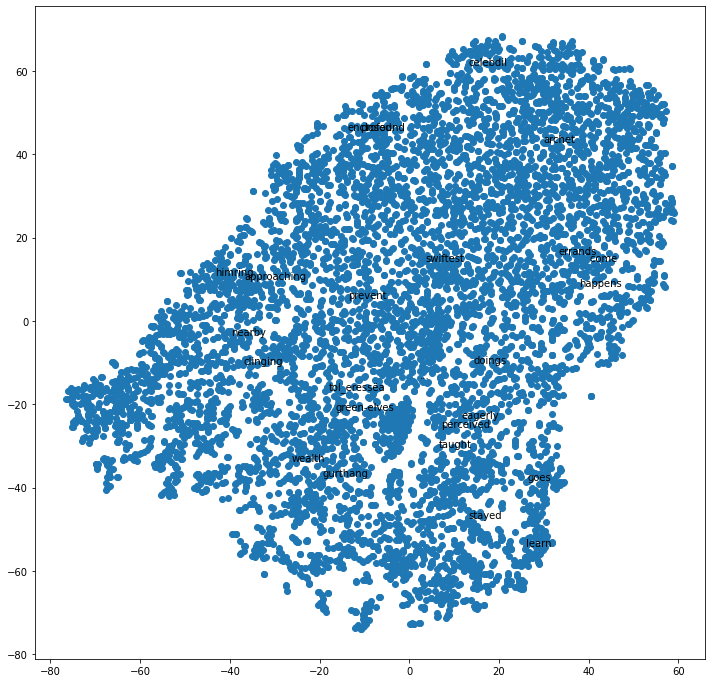

after


In [160]:
import matplotlib.pyplot as plt
import random
%matplotlib inline

random.seed(0)
print("before")
plt.figure(figsize=(12, 12))
plt.scatter(x_vals, y_vals)

# Label randomly subsampled 25 data points
#


indices = list(range(len(labels)))
selected_indices = random.sample(indices, 25)
for i in selected_indices:
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))
plt.show();
print("after")

In [162]:
import time

st = time.time()
model_three_books.train(all_bigram_tokens, total_words=model_three_books.corpus_total_words, epochs=100)
et = time.time()

print(et-st)

89.28402495384216


In [163]:
model_three_books.wv.most_similar("smaug")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dragon', 0.5151079297065735),
 ('goblins', 0.4186294674873352),
 ('dori', 0.4024121165275574),
 ('morgoth', 0.3964056968688965),
 ('shelob', 0.39089828729629517),
 ('balin', 0.37216487526893616),
 ('bombur', 0.3710308372974396),
 ('bilbo', 0.36994537711143494),
 ('everybody', 0.36615467071533203),
 ('enemy', 0.36508235335350037)]